<a href="https://colab.research.google.com/github/Adetia-Raymond/PBO-Week9/blob/main/PySpark-SQL-Query.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("MySparkApp").getOrCreate()

# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [ ]:
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


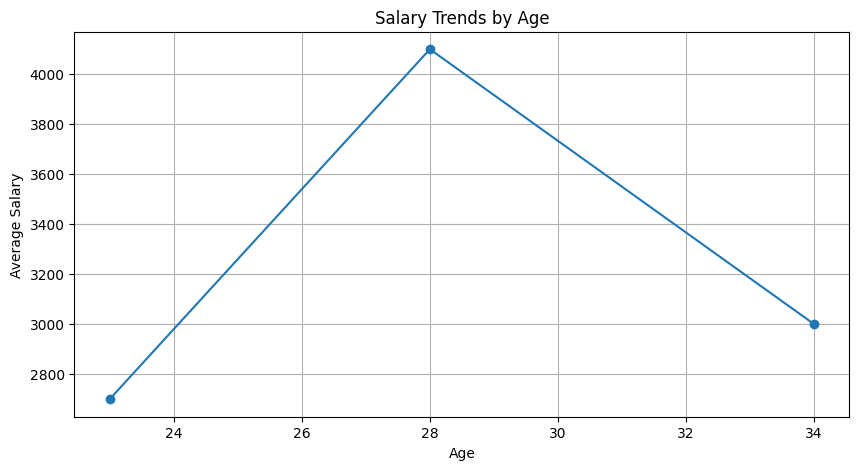

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


# Tugas 1

+---------+-----------+-------------+
| DeptName|TotalSalary|EmployeeCount|
+---------+-----------+-------------+
|       HR|       5700|            2|
|Marketing|       4100|            1|
+---------+-----------+-------------+



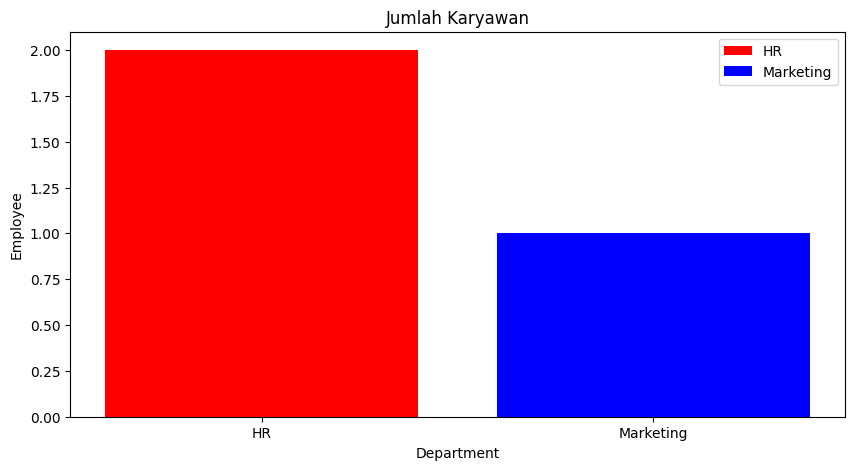

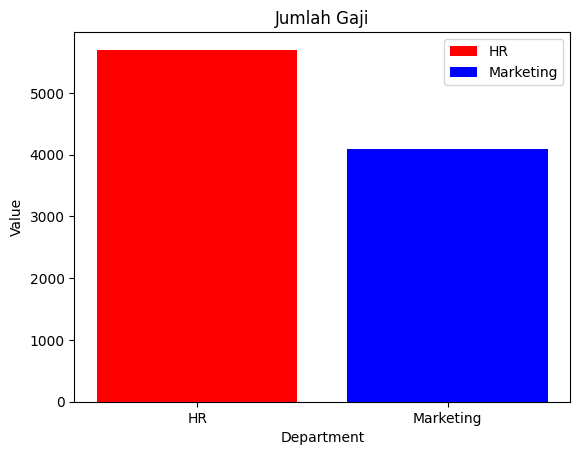

In [ ]:
dept_stats = spark.sql("""
    SELECT d.DeptName, SUM(e.Salary) AS TotalSalary, COUNT(*) AS EmployeeCount
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName
    """)

dept_stats.show()
dept_stats_pd = dept_stats.toPandas()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(dept_stats_pd['DeptName'], dept_stats_pd['EmployeeCount'], label=['HR','Marketing'], color=['red','blue'])
plt.xlabel('Department')
plt.ylabel('Employee')
plt.title('Jumlah Karyawan')
plt.legend()
plt.show()

plt.bar(dept_stats_pd['DeptName'], dept_stats_pd['TotalSalary'], label=['HR','Marketing'], color=['red','blue'])
plt.xlabel('Department')
plt.ylabel('Value')
plt.title('Jumlah Gaji')
plt.legend()
plt.show()

# Tugas 2

+---+------------------+
|Age|     AverageSalary|
+---+------------------+
| 34|            3100.0|
| 28|3466.6666666666665|
| 23|            2800.0|
+---+------------------+

+----+---+------+
|Name|Age|Salary|
+----+---+------+
|Anna| 28|  4100|
|Jane| 34|  3200|
|John| 23|  2900|
+----+---+------+

above_avg_employees_pd:
   Name  Age  Salary
0  Anna   28    4100
1  Jane   34    3200
2  John   23    2900


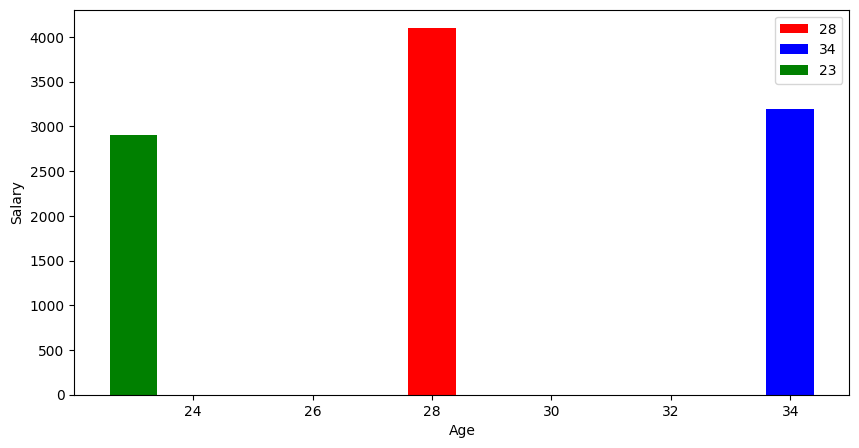

In [ ]:
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('John', 23, 'M', 2900, 2),
    ('Jeff', 28, 'M', 3300, 2),
    ('Jess', 28, 'F', 3000, 1),
    ('Jane', 34, 'F', 3200, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

avg_salary_by_age = spark.sql("""
    SELECT Age, AVG(Salary) AS AverageSalary
    FROM employees
    GROUP BY Age
    """)
avg_salary_by_age.createOrReplaceTempView('avg_salary_by_age')
avg_salary_by_age.show()

above_avg_employees = spark.sql("""
    SELECT e.Name, e.Age, e.Salary
    FROM employees e
    JOIN avg_salary_by_age a ON e.Age = a.Age
    WHERE e.Salary > a.AverageSalary
    """)
above_avg_employees.createOrReplaceTempView('above_avg_employees')
above_avg_employees.show()

above_avg_employees_pd = above_avg_employees.toPandas()

print("above_avg_employees_pd:")
print(above_avg_employees_pd)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.bar(above_avg_employees_pd['Age'], above_avg_employees_pd['Salary'],label=above_avg_employees_pd['Age'], color=['red','blue','green'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()



In [4]:
from pyspark.sql import Row
import random
import datetime

# Generate sample sales data
sales_data = [
    Row(transaction_id=i,
        customer_id=random.randint(1, 50),
        category=random.choice(['Electronics', 'Clothing', 'Grocery', 'Sports', 'Toys']),
        amount=round(random.uniform(5, 500), 2),
        date=(datetime.date(2023, random.randint(1, 12), random.randint(1, 28))))
    for i in range(1, 101)
]

# Create a DataFrame
sales_df = spark.createDataFrame(sales_data)
sales_df.createOrReplaceTempView("sales")
sales_df.show(10)


+--------------+-----------+-----------+------+----------+
|transaction_id|customer_id|   category|amount|      date|
+--------------+-----------+-----------+------+----------+
|             1|         46|Electronics|217.45|2023-06-22|
|             2|         23|Electronics|105.47|2023-03-09|
|             3|         44|Electronics|224.74|2023-05-25|
|             4|         40|     Sports|490.99|2023-04-03|
|             5|         46|   Clothing|143.11|2023-05-01|
|             6|         48|     Sports|163.17|2023-12-27|
|             7|         30|       Toys|211.38|2023-05-01|
|             8|         42|       Toys| 78.65|2023-09-06|
|             9|         49|   Clothing|376.99|2023-12-19|
|            10|         41|Electronics|160.79|2023-03-23|
+--------------+-----------+-----------+------+----------+
only showing top 10 rows



In [5]:
customer_data = [
    Row(customer_id=i,
        name=f"Customer {i}",
        age=random.randint(18, 70),
        gender=random.choice(['M', 'F']),
        country=random.choice(['USA', 'Canada', 'UK', 'Germany', 'France']))
    for i in range(1, 51)
]

customer_df = spark.createDataFrame(customer_data)
customer_df.createOrReplaceTempView("customers")
customer_df.show(10)


+-----------+-----------+---+------+-------+
|customer_id|       name|age|gender|country|
+-----------+-----------+---+------+-------+
|          1| Customer 1| 18|     M| Canada|
|          2| Customer 2| 50|     F|Germany|
|          3| Customer 3| 21|     M| France|
|          4| Customer 4| 50|     F| Canada|
|          5| Customer 5| 50|     M|     UK|
|          6| Customer 6| 60|     M|Germany|
|          7| Customer 7| 56|     M| France|
|          8| Customer 8| 70|     F|     UK|
|          9| Customer 9| 60|     M| France|
|         10|Customer 10| 60|     M| France|
+-----------+-----------+---+------+-------+
only showing top 10 rows



+-----------+-----------------+
|   category|      total_sales|
+-----------+-----------------+
|Electronics|6781.479999999999|
|       Toys|          5197.95|
|   Clothing|5074.889999999999|
|     Sports|4300.709999999999|
|    Grocery|           2846.7|
+-----------+-----------------+

+-----------+------------------+
|customer_id|         avg_sales|
+-----------+------------------+
|         26|            323.72|
|         19|           251.155|
|          7| 263.2966666666667|
|         34|162.79333333333332|
|         50|           205.752|
+-----------+------------------+
only showing top 5 rows



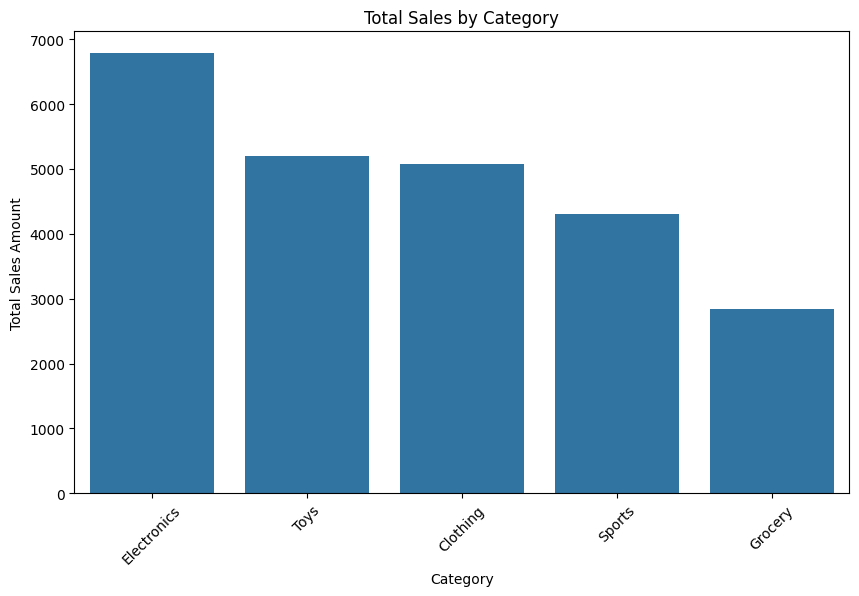

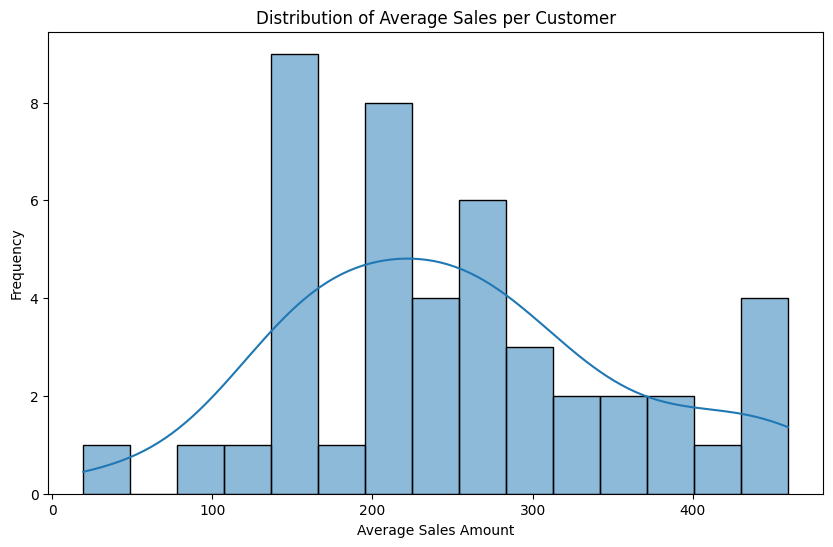

In [10]:
total_sales_by_category = spark.sql("""
SELECT category, SUM(amount) as total_sales
FROM sales
GROUP BY category
ORDER BY total_sales DESC
""")
total_sales_by_category.show()

avg_sales_per_customer = spark.sql("""
SELECT customer_id, AVG(amount) as avg_sales
FROM sales
GROUP BY customer_id
""")
avg_sales_per_customer.show(5)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


total_sales_by_category_pd = total_sales_by_category.toPandas()
avg_sales_per_customer_pd = avg_sales_per_customer.toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x="category", y="total_sales", data=total_sales_by_category_pd)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(avg_sales_per_customer_pd["avg_sales"], bins=15, kde=True)
plt.title("Distribution of Average Sales per Customer")
plt.xlabel("Average Sales Amount")
plt.ylabel("Frequency")
plt.show()